In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [4]:
iris = pd.read_csv("iris.csv")

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris["variety"].value_counts()

,count
variety,
Setosa,50
Versicolor,50
Virginica,50


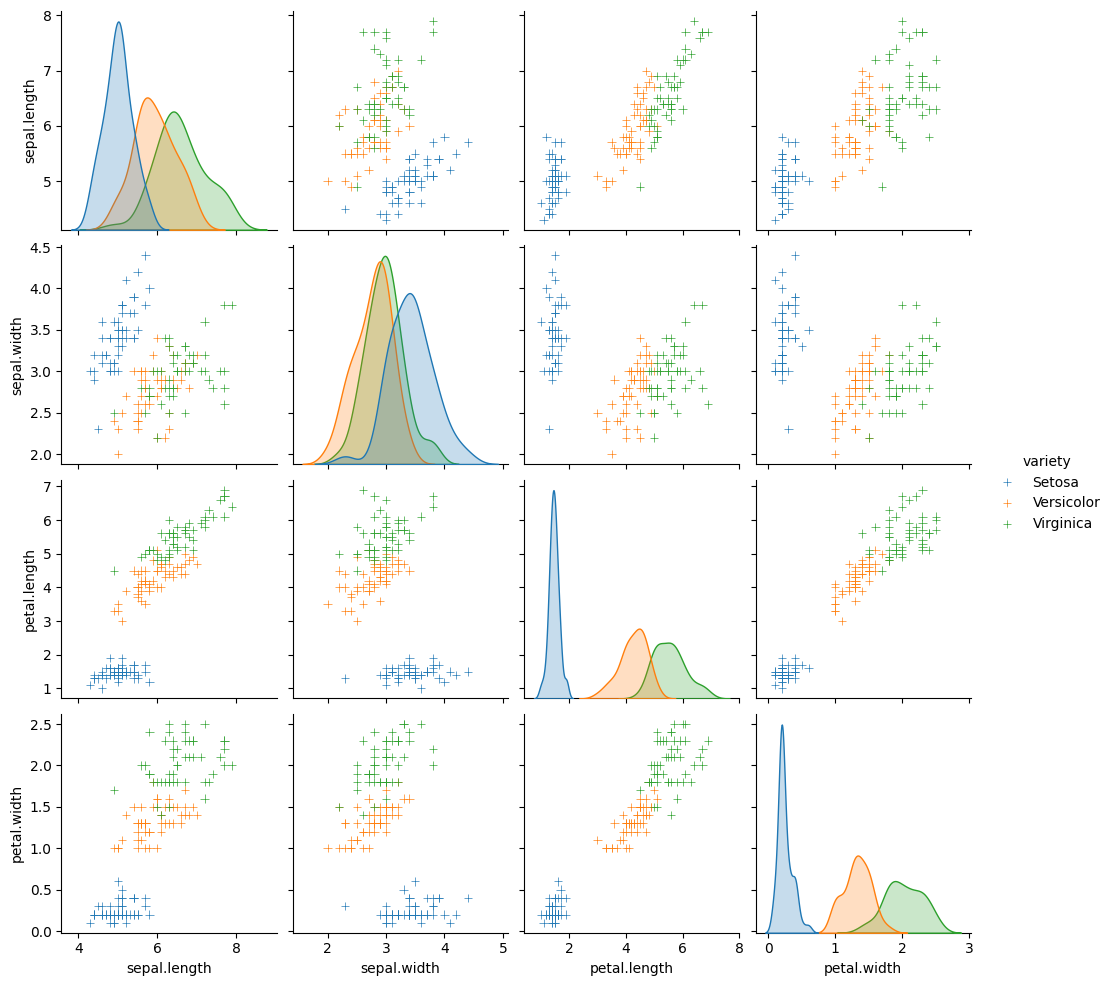

In [10]:
g = sns.pairplot(iris,hue="variety",markers="+")
plt.show()

In [11]:
iris.shape

(150, 5)

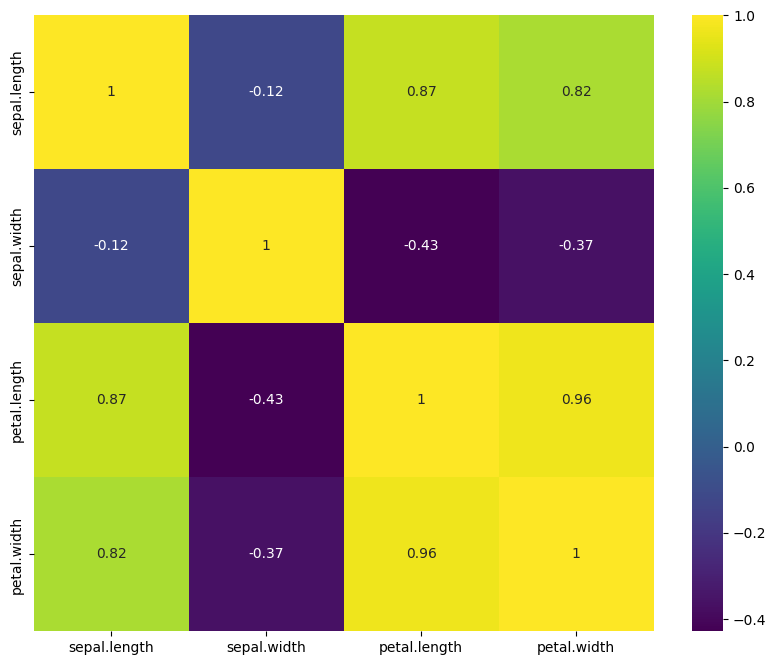

In [19]:
corr = iris.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="viridis", annot=True)
plt.show()

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics




In [23]:
iris


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [25]:
X= iris.drop("variety",axis=1)
Y= iris["variety"]

In [26]:
X.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
Y.head()

,variety
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.35,random_state=5)

In [30]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [31]:
y_pred = model.predict(X_test)

In [32]:
y_pred

array(['Versicolor', 'Virginica', 'Virginica', 'Setosa', 'Virginica',
       'Versicolor', 'Setosa', 'Virginica', 'Setosa', 'Versicolor',
       'Versicolor', 'Virginica', 'Virginica', 'Virginica', 'Setosa',
       'Setosa', 'Virginica', 'Virginica', 'Setosa', 'Setosa',
       'Versicolor', 'Virginica', 'Setosa', 'Versicolor', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Versicolor', 'Virginica',
       'Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Versicolor',
       'Setosa', 'Setosa', 'Virginica', 'Setosa', 'Virginica',
       'Virginica', 'Versicolor', 'Setosa', 'Setosa', 'Versicolor',
       'Virginica', 'Versicolor', 'Virginica', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Setosa'], dtype=object)

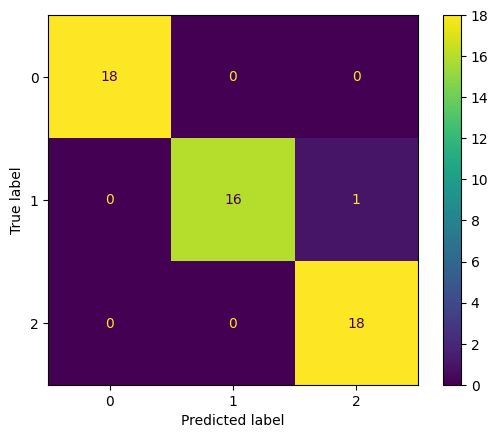

In [34]:

# compute confusion matrix
cm = metrics.confusion_matrix(Y_test, y_pred)

# display confusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="viridis")  # you can change the colormap if you like
plt.show()

In [35]:
cm

array([[18,  0,  0],
       [ 0, 16,  1],
       [ 0,  0, 18]])

In [37]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        18
  Versicolor       1.00      0.94      0.97        17
   Virginica       0.95      1.00      0.97        18

    accuracy                           0.98        53
   macro avg       0.98      0.98      0.98        53
weighted avg       0.98      0.98      0.98        53

